# Logistic Regression (Binary Classifiation)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import  seaborn as sns

In [8]:
dataset = pd.read_csv(r"D:\Project Data Set\Social_Network_Ads\New_Social_Network_Ads.csv")
dataset.head(3)

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0


In [9]:
# dropping EstinatedSalary Column.
dataset.drop(columns=['EstimatedSalary'], inplace=True)
dataset.head(3)

,Age,Purchased
0,19,0
1,35,0
2,26,0


### Basically, Guess frm age if the person has any social media subscription or not


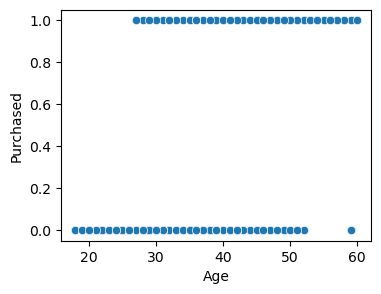

In [11]:
plt.figure(figsize=(4,3))
sns.scatterplot(x='Age', y='Purchased',data=dataset)
plt.show()

In [13]:
x = dataset[['Age']]
y =dataset['Purchased']

In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [16]:
from sklearn.linear_model import LogisticRegression
lr= LogisticRegression().fit(x_train, y_train)

In [17]:
lr.score(x_test, y_test)

0.9125

In [19]:
lr.predict([[40]])

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

#### This means, 40 yr has no Social Media subscription 

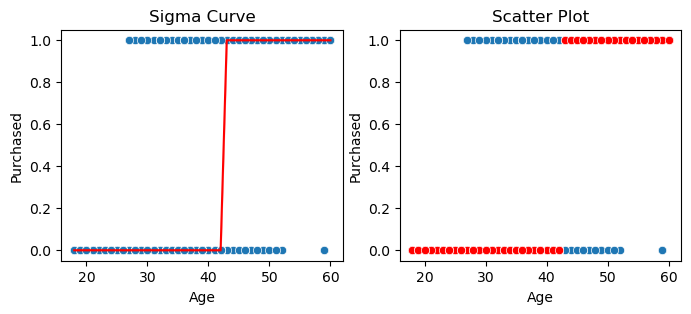

In [29]:
# Prediction Line

plt.figure(figsize=(8,3))
plt.subplot(1,2,1)
plt.title('Sigma Curve')
sns.scatterplot(x='Age', y='Purchased',data=dataset)
sns.lineplot(x='Age', y=lr.predict(x), data= dataset, color='r')

plt.subplot(1,2,2)
plt.title('Scatter Plot')
sns.scatterplot(x='Age', y='Purchased',data=dataset)
sns.scatterplot(x='Age', y=lr.predict(x), data= dataset, color='r')

plt.show()

# Logistic Regression (Binary Classifiation) - Multiple Input

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import  seaborn as sns

In [6]:
dataset = pd.read_csv(r'D:\Project Data Set\cgpa_score-placed\cgpa_score-placed.csv')
dataset.head(3)

,cgpa,resume_score,placed
0,8.14,6.52,1
1,6.17,5.17,0
2,8.27,8.86,1


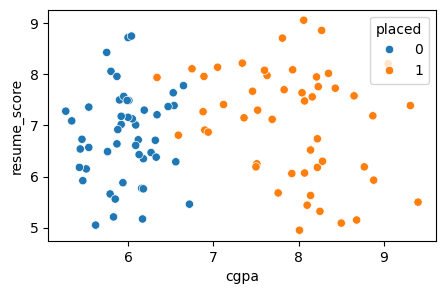

In [7]:
plt.figure(figsize=(5,3))
sns.scatterplot(x='cgpa', y='resume_score', data=dataset, hue='placed')
plt.show()

In [9]:
x = dataset.iloc[:,:-1] # check dimention with x.ndim
y = dataset['placed']

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [11]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression().fit(x_train,y_train)

In [12]:
lr.score(x_test, y_test)

1.0

In [13]:
lr.predict([[8.14, 6.52]]) # 8.14	6.52	

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

#### giving the  Correct Prediction.

In [14]:
from mlxtend.plotting import plot_decision_regions

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


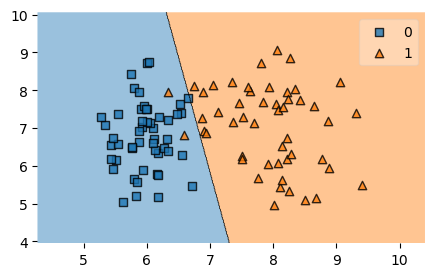

In [16]:
plt.figure(figsize=(5,3))
plot_decision_regions(x.to_numpy(), y.to_numpy(), clf=lr)

plt.show()

In [17]:
lr.coef_

array([[3.03417823, 0.49690768]])

In [18]:
lr.intercept_

array([-24.13435286])

# Logistic Regression (Binary Classifiation) - Polynomial Input

In [35]:
dataset = pd.read_csv(r"D:\Project Data Set\polynomial_clasification.csv")
dataset.head(3)

,data1,data2,output
0,0.03,0.99,0
1,2.12,-0.05,1
2,0.88,-0.08,0


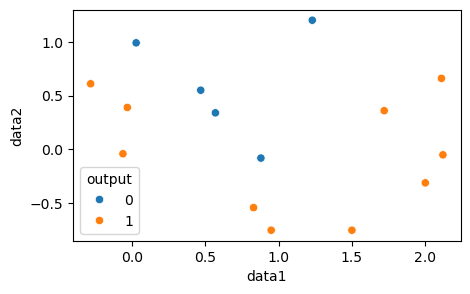

In [36]:
plt.figure(figsize=(5,3))
sns.scatterplot(x='data1', y='data2', data=dataset, hue='output')
plt.show()

#### it's not clearly classified.


## Norma Logistic Regresion Approach

In [41]:
x = dataset.iloc[:,:-1]
y = dataset['output']

In [42]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [43]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression().fit(x_train, y_train)

In [44]:
lr.score(x_test, y_test)

1.0

In [45]:
# graph makng through mlxtend
from mlxtend.plotting import plot_decision_regions

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


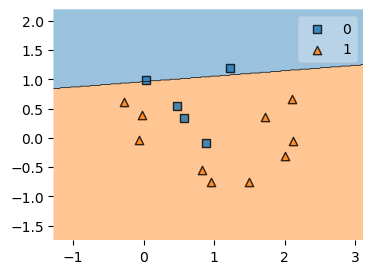

In [50]:
plt.figure(figsize=(4,3))
plot_decision_regions(x.to_numpy(), y.to_numpy(), clf=lr)
plt.show()

### Not a proper fit. Elements are misplacing in each other's region.

# Polynomial Feature

In [72]:
x = dataset.iloc[:,:-1]
y = dataset['output']

In [73]:
from sklearn.preprocessing import PolynomialFeatures

In [74]:
pf = PolynomialFeatures(degree=2) 
pf.fit(x)
x = pd.DataFrame(pf.transform(x))

In [75]:
x.shape

(15, 6)

In [76]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [80]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression().fit(x_train, y_train)

In [81]:
lr.score(x_test, y_test)

1.0